In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Dataset_08-29-2019.txt', sep='\t', encoding='unicode_escape')

Total number of rows: 66161
Number of Sentences: 2999
AVG Number of words per sentence: 22
Number of Unique Words: 8766


Plot of word with over 200 instances


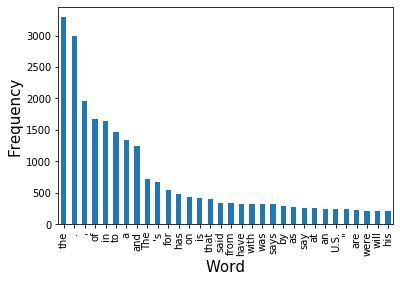

In [3]:
## plot high level ideas 
# number of rows in data COMPLETE
total_rows = len(df.index)
print("Total number of rows: " + str(total_rows))
# Number of sentences COMPLETE
total_sentences = int(df['Sentence #'].max())
print("Number of Sentences: " + str(total_sentences))
print('AVG Number of words per sentence: ' + str(int(total_rows/total_sentences)))
# number of unique words and their distribution COMPLETE
words = df.groupby(['Word']).count()
print("Number of Unique Words: " + str(len(words)))
words = words.sort_values('POS', ascending = False)
important_words = words.loc[(words['POS'] > 200)]
important_words['POS'].plot(kind='bar')
plt.xlabel('Word', size = 15)
plt.ylabel('Frequency', size = 15)
print('\n')
print('Plot of word with over 200 instances')
# same with PoS and Tag COMPLETE

POS Frequency Bar Chart


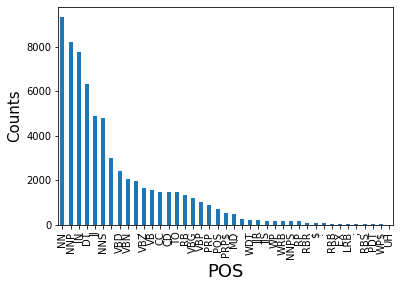

In [4]:
#POS Frequency Bar Chart
df['POS'].value_counts().plot(kind='bar')
plt.ylabel('Counts',size=15)
plt.xlabel('POS', size=18)
print('POS Frequency Bar Chart')

Tag Frequency Bar Chart


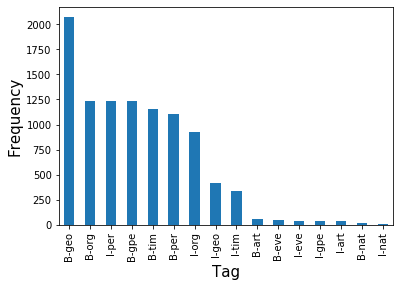

In [5]:
#Tag Frequency Bar Chart

altered_tag = df.loc[(df['Tag'] != 'O')]
altered_tag['Tag'].value_counts().plot(kind='bar')
plt.ylabel('Frequency', size = 15)
plt.xlabel('Tag', size = 15)
print('Tag Frequency Bar Chart')

tim tag Part of Speech Bar Chart
**This differs by having a significant other POS being CD


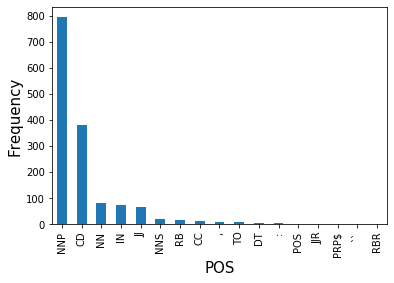

In [6]:
## plot info related to tags COMPLETE

#group by Tag and then make POS plots COMPLETE
#  do this as a ratio of that bucket COMPLETE

# For each tag I made a subset and then made a POS plot
tag_df = df.loc[(df['Tag'] == 'B-tim') | (df['Tag'] == 'I-tim')]
tag_df['POS'].value_counts().plot(kind='bar')
plt.ylabel('Frequency', size = 15)
plt.xlabel('POS', size = 15)
print('tim tag Part of Speech Bar Chart')
print('**This differs by having a significant other POS being CD')

Geo Part of Speech Bar Chart
**This is what a majority of the tag charts look like... they have a large proportion of NNP
     with NNPS being the most likely second


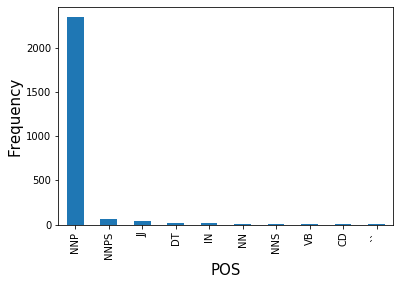

In [7]:
tag_df = df.loc[(df['Tag'] == 'B-geo') | (df['Tag'] == 'I-geo')]
tag_df['POS'].value_counts().plot(kind='bar')
plt.ylabel('Frequency', size = 15)
plt.xlabel('POS', size = 15)
print('Geo Part of Speech Bar Chart')
print('**This is what a majority of the tag charts look like... they have a large proportion of NNP')
print('     with NNPS being the most likely second')

I-tim Part of Speech Bar Chart
**Important to note that tag has a POS (CD) that is higher than NNP, and in fact has NN also higher


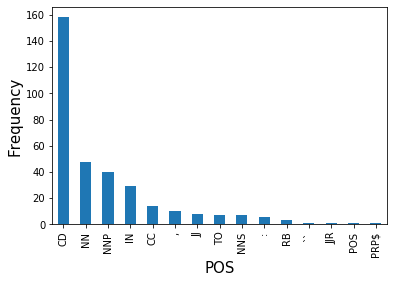

In [8]:
tag_df = df.loc[(df['Tag'] == 'I-tim')]
tag_df['POS'].value_counts().plot(kind='bar')
plt.ylabel('Frequency', size = 15)
plt.xlabel('POS', size = 15)
print('I-tim Part of Speech Bar Chart')
print('**Important to note that tag has a POS (CD) that is higher than NNP, and in fact has NN also higher')

Gpe Part of Speech Bar Chart
**This is important to note because JJ actually overtakes JJ and is the highest frequency POS among the gpe tag


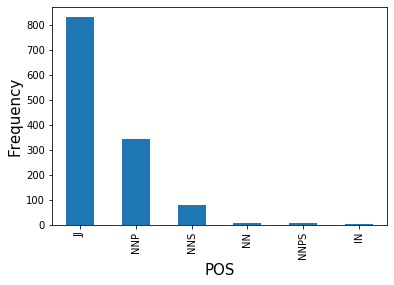

In [9]:
tag_df = df.loc[(df['Tag'] == 'B-gpe') | (df['Tag'] == 'I-gpe')]
tag_df['POS'].value_counts().plot(kind='bar')
plt.ylabel('Frequency', size = 15)
plt.xlabel('POS', size = 15)
print('Gpe Part of Speech Bar Chart')
print('**This is important to note because JJ actually overtakes JJ and is the highest frequency POS among the gpe tag')

In [10]:
def proportions(x, sr):
    return x / sr.sum()

print('Findings')
print('----------')
print('Proportions for NNP, NNPS is high, with O being not the top tag and highest tags above 0.1 (10% of all POS)')
print('\n')
print('Somewhat significant important tags (1st tag above 0.1) in CD, NN')
print('\n')
print('Little significance in important tags (0.01 to 0.02) in NNS, CC, :')
print('\n')
print('Proportions of important tags are all very low (<0.01) in NN, IN, DT, VBN, TO, RB, ,, POS, PRP$, JJR, RBR, ``')
print('\n')
print('VBD, VBZ, ., VBG, VBP, PRP, MD, WDT, JJS, WP, WRB, RP, $, RRB, EX, LRB, ;, RBS, PDT, WP$ has no tag other than O')

Findings
----------
Proportions for NNP, NNPS is high, with O being not the top tag and highest tags above 0.1 (10% of all POS)


Somewhat significant important tags (1st tag above 0.1) in CD, NN


Little significance in important tags (0.01 to 0.02) in NNS, CC, :


Proportions of important tags are all very low (<0.01) in NN, IN, DT, VBN, TO, RB, ,, POS, PRP$, JJR, RBR, ``


VBD, VBZ, ., VBG, VBP, PRP, MD, WDT, JJS, WP, WRB, RP, $, RRB, EX, LRB, ;, RBS, PDT, WP$ has no tag other than O


Example of a POS where important tags are significantly integrated


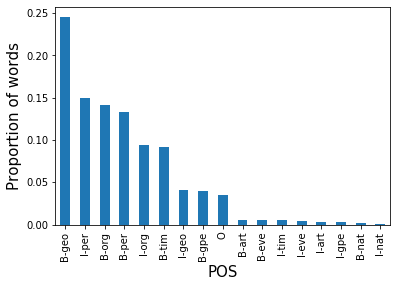

In [11]:
pos_df = df.loc[(df['POS'] == "NNP")]
pos_series = pos_df['Tag'].value_counts()
pos_series = pos_series.apply(proportions, args=(pos_series,))
pos_series[:].plot(kind='bar')
plt.xlabel('POS', size = 15)
plt.ylabel('Proportion of words', size = 15)
print('Example of a POS where important tags are significantly integrated')

Example of a POS where important tags are not significantly integrated but are still present


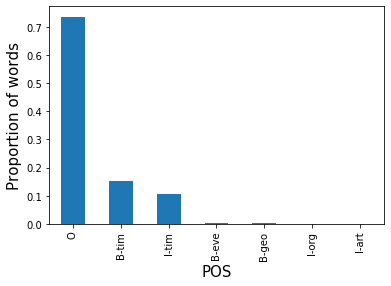

In [12]:
pos_df = df.loc[(df['POS'] == "CD")]
pos_series = pos_df['Tag'].value_counts()
pos_series = pos_series.apply(proportions, args=(pos_series,))
pos_series[:].plot(kind='bar')
plt.xlabel('POS', size = 15)
plt.ylabel('Proportion of words', size = 15)
print('Example of a POS where important tags are not significantly integrated but are still present')

Example of a POS where important tags are very minimally present


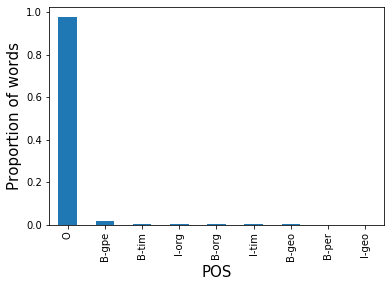

In [13]:
pos_df = df.loc[(df['POS'] == "NNS")]
pos_series = pos_df['Tag'].value_counts()
pos_series = pos_series.apply(proportions, args=(pos_series,))
pos_series[:].plot(kind='bar')
plt.xlabel('POS', size = 15)
plt.ylabel('Proportion of words', size = 15)
print('Example of a POS where important tags are very minimally present')

Example of a POS where important tags are not present


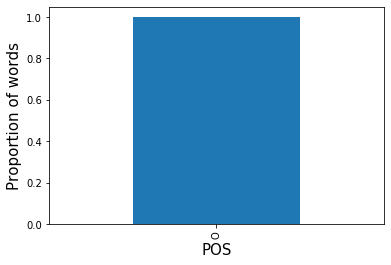

In [14]:
pos_df = df.loc[(df['POS'] == "VBD")]
pos_series = pos_df['Tag'].value_counts()
pos_series = pos_series.apply(proportions, args=(pos_series,))
pos_series[:].plot(kind='bar')
plt.xlabel('POS', size = 15)
plt.ylabel('Proportion of words', size = 15)
print('Example of a POS where important tags are not present')

Histogram of proportion of important tag in each POS
It is key to see that a lot of the POS have no tags, some have very little but nonzero tags, 
     and some have a very large proportion


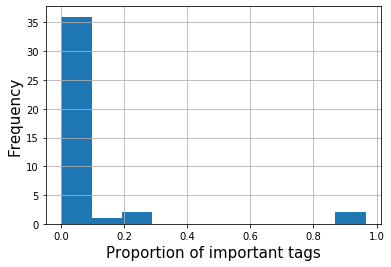

In [15]:
#Proof that I can make a histogram out of a list (just convert to pandas series)
proportions_list = []
for POS in df.POS.unique():
    pos_df = df.loc[(df['POS'] == POS)]
    pos_series = pos_df['Tag'].value_counts()
    if pos_series.size == 1:
        proportions_list.append(0.0)
    else:
        mask = pos_series.index.isin(['O'])
        proportions_list.append(pos_series.loc[~mask].sum() / pos_series.sum())
pd.Series(proportions_list).hist()
plt.ylabel('Frequency', size = 15)
plt.xlabel('Proportion of important tags', size = 15)
print('Histogram of proportion of important tag in each POS')
print('It is key to see that a lot of the POS have no tags, some have very little but nonzero tags, ')
print('     and some have a very large proportion')

In [16]:
# get familiar with correlation matrix plots

#Correlation matrix plots still confuse me and I don't know when to properly use them

# Feature Generation

In [17]:
df.loc[(df['Tag'] == 'B-art') | (df['Tag'] == 'I-art')].groupby('Word').count().sort_values('Tag').tail(20)

,Unnamed: 0,Sentence #,POS,Tag
Word,,,,
Internet,1,1,1,1
Ills,1,1,1,1
Icon,1,1,1,1
Endangered,1,1,1,1
Hotel,1,1,1,1
House,1,1,1,1
Good,1,1,1,1
Gaulle,1,1,1,1
Garden,1,1,1,1


In [18]:
#Functions shell
def isUpper(x):
    if x[0].isupper():
        return 1
    return 0
def isTag(x):
    if x == 'O':
        return 0
    return 1
def lengt(x):
    return len(x)
def endY(x):
    if x[-1] == 'y':
        return 1
    return 0
def isNum(x):
    if x.isnumeric():
        return 1
    return 0
def isNNP(x):
    if x == 'NNP':
        return 1
    return 0
def isJJ(x):
    if x == 'JJ':
        return 1
    return 0
def isCD(x):
    if x == 'CD':
        return 1
    return 0
def endS(x):
    if x[-1] == 's':
        return 1
    return 0
def otherCap(x):
    for letter in x:
        if letter.isupper():
            return 1
    return 0
def endan(x):
    if x[-2:len(x)] == 'an':
        return 1
    return 0
def endish(x):
    if x[-3:len(x)] == 'ish':
        return 1
    return 0
def endese(x):
    if x[-3:len(x)] == 'ese':
        return 1
    return 0
def propVow(x):
    vowels = 'aeiouAEIOU'
    numVow = 0
    for letter in x:
        if letter in vowels:
            numVow += 1
    return numVow / len(x)

In [19]:
#Reference to look at
df['isTag'] = df['Tag'].apply(lambda x: isTag(x))
df.head()

,Unnamed: 0,Sentence #,Word,POS,Tag,isTag
0,0,1.0,Thousands,NNS,O,0
1,1,1.0,of,IN,O,0
2,2,1.0,demonstrators,NNS,O,0
3,3,1.0,have,VBP,O,0
4,4,1.0,marched,VBN,O,0


In [20]:
# is the word capitalized
df1 = df.copy()
df1['isFirstCapitalised'] = df1['Word'].apply(lambda x: isUpper(x))

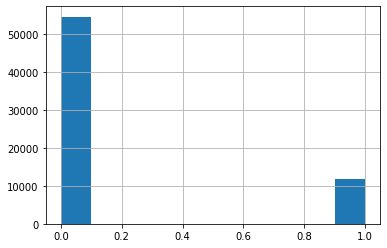

In [21]:
df1['isFirstCapitalised'].hist()

The proportion of tags that are capitalised are very large, 
    both in general and compared to overall proportion of capitalization


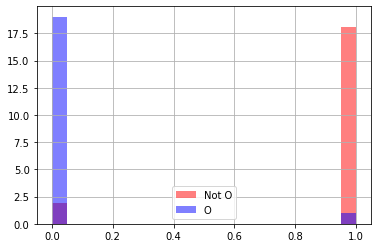

In [50]:
#df1.loc[(df1['Tag'] != 'O')]['isFirstCapitalised'].hist()
df1[df1["Tag"]!="O"]["isFirstCapitalised"].hist(alpha=0.5, bins=[x*0.05 for x in range(21)], normed=True, label = 
                                                'Not O', color = 'red')
df1[df1["Tag"]=="O"]["isFirstCapitalised"].hist(alpha=0.5, bins=[x*0.05 for x in range(21)], normed=True, label = 
                                                "O", color = 'blue')
plt.legend()
print('The proportion of tags that are capitalised are very large, ')
print('    both in general and compared to overall proportion of capitalization')

Scatterplot of proportion of tags to proportion of capitalized words in a sentence... 
    there appears to be a moderately strong correlation


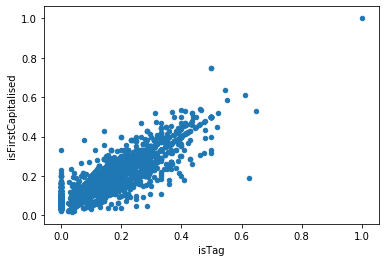

In [37]:
sent_df = df1.groupby(df1['Sentence #']).mean()
sent_df.plot.scatter(x='isTag', y='isFirstCapitalised')
print('Scatterplot of proportion of tags to proportion of capitalized words in a sentence... ')
print('    there appears to be a moderately strong correlation')

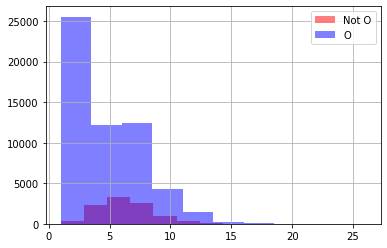

In [36]:
df1['Length'] = df1['Word'].apply(lambda x: lengt(x))
df1[df1["Tag"]!="O"]["Length"].hist(alpha=0.5, label = 
                                                'Not O', color = 'red')
df1[df1["Tag"]=="O"]['Length'].hist(alpha = 0.5, label = 'O', color = 'blue')
plt.legend()

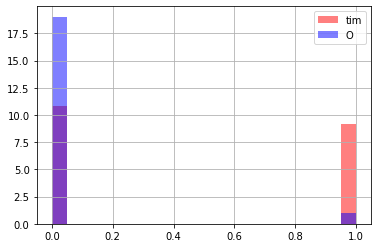

In [77]:
df1['endY'] = df1['Word'].apply(lambda x: endY(x))
df1.loc[(df1["Tag"]=="B-tim") | (df1['Tag']=='I-tim')]["endY"].hist(alpha=0.5, bins=[x*0.05 for x in range(21)], normed=True, label = 
                                                'tim', color = 'red')
df1[df1["Tag"]=="O"]["endY"].hist(alpha=0.5, bins=[x*0.05 for x in range(21)], normed=True, label = 
                                                "O", color = 'blue')
plt.legend()

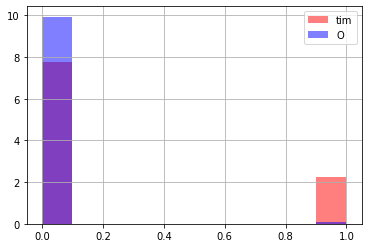

In [78]:
df1['isNum'] = df1['Word'].apply(lambda x: isNum(x))
df1.loc[(df1['Tag'] == 'B-tim') | (df1['Tag'] == 'I-tim')]["isNum"].hist(alpha=0.5, label = 
                                                'tim', normed = True, color = 'red')
df1[df1["Tag"]=="O"]['isNum'].hist(alpha = 0.5, label = 'O', normed=True, color = 'blue')
plt.legend()

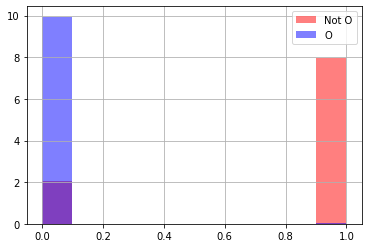

In [79]:
df1['isNNP'] = df1['POS'].apply(lambda x: isNNP(x))
df1.loc[(df1['Tag'] != 'O')]["isNNP"].hist(alpha=0.5, label = 
                                                'Not O', normed = True, color = 'red')
df1[df1["Tag"]=="O"]['isNNP'].hist(alpha = 0.5, label = 'O', normed=True, color = 'blue')
plt.legend()

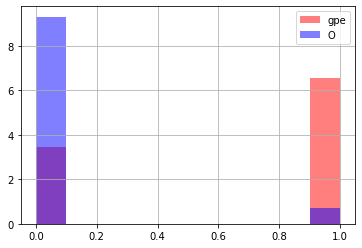

In [80]:
df1['isJJ'] = df1['POS'].apply(lambda x: isJJ(x))
df1.loc[(df1['Tag'] == 'B-gpe') | (df1['Tag'] == "I-gpe")]["isJJ"].hist(alpha=0.5, label = 
                                                'gpe', normed = True, color = 'red')
df1[df1["Tag"]=="O"]['isJJ'].hist(alpha = 0.5, label = 'O', normed=True, color = 'blue')
plt.legend()

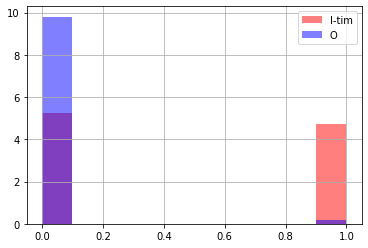

In [81]:
df1['isCD'] = df1['POS'].apply(lambda x: isCD(x))
df1.loc[(df1['Tag'] == 'I-tim')]["isCD"].hist(alpha=0.5, label = 
                                                'I-tim', normed = True, color = 'red')
df1[df1["Tag"]=="O"]['isCD'].hist(alpha = 0.5, label = 'O', normed=True, color = 'blue')
plt.legend()

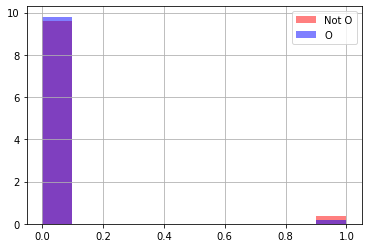

In [82]:
df1['endS'] = df1['Word'].apply(lambda x: endS(x))
df1.loc[(df1['Tag'] != 'O')]["isCD"].hist(alpha=0.5, label = 
                                                'Not O', normed = True, color = 'red')
df1[df1["Tag"]=="O"]['isCD'].hist(alpha = 0.5, label = 'O', normed=True, color = 'blue')
plt.legend()

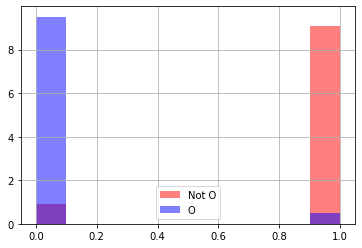

In [83]:
df1['otherCap'] = df1['Word'].apply(lambda x: otherCap(x))
df1.loc[(df1['Tag'] != 'O')]["otherCap"].hist(alpha=0.5, label = 
                                                'Not O', normed = True, color = 'red')
df1[df1["Tag"]=="O"]['otherCap'].hist(alpha = 0.5, label = 'O', normed=True, color = 'blue')
plt.legend()

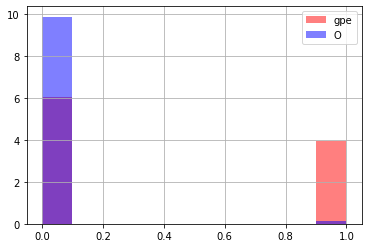

In [85]:
df1['endan'] = df1['Word'].apply(lambda x: endan(x))
df1.loc[(df1['Tag'] == 'B-gpe') | (df1["Tag"] == "I-gpe")]["endan"].hist(alpha=0.5, label = 
                                                'gpe', normed = True, color = 'red')
df1[df1["Tag"]=="O"]['endan'].hist(alpha = 0.5, label = 'O', normed=True, color = 'blue')
plt.legend()

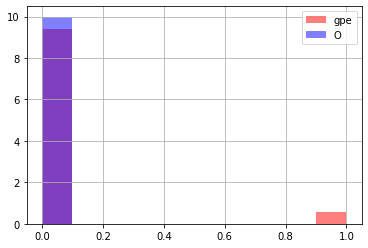

In [86]:
df1['endish'] = df1['Word'].apply(lambda x: endish(x))
df1.loc[(df1['Tag'] == 'B-gpe') | (df1["Tag"] == "I-gpe")]["endish"].hist(alpha=0.5, label = 
                                                'gpe', normed = True, color = 'red')
df1[df1["Tag"]=="O"]['endish'].hist(alpha = 0.5, label = 'O', normed=True, color = 'blue')
plt.legend()

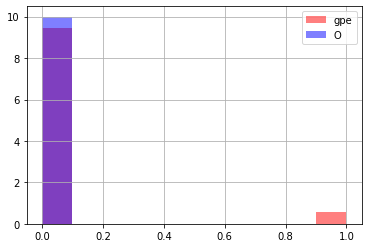

In [87]:
df1['endese'] = df1['Word'].apply(lambda x: endese(x))
df1.loc[(df1['Tag'] == 'B-gpe') | (df1["Tag"] == "I-gpe")]["endese"].hist(alpha=0.5, label = 
                                                'gpe', normed = True, color = 'red')
df1[df1["Tag"]=="O"]['endese'].hist(alpha = 0.5, label = 'O', normed=True, color = 'blue')
plt.legend()

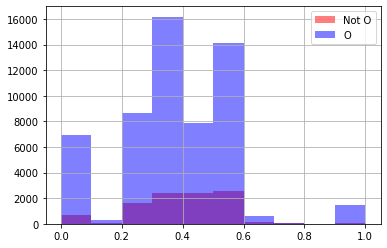

In [46]:
df1['propVow'] = df1['Word'].apply(lambda x: propVow(x))
df1[df1["Tag"]!="O"]["propVow"].hist(alpha=0.5, label = 
                                                'Not O', color = 'red')
df1[df1["Tag"]=="O"]['propVow'].hist(alpha = 0.5, label = 'O', color = 'blue')
plt.legend()

In [35]:
print('Current list of effective factors:')
print('\n')
print('Significant Factors:   Other Letters being Capitalized, GPE tags being JJ POS, tags being NNP POS')
print('                     i-Tim tags being CD POS, tim tags ending in "y", and the word being capitalized,')
print('                     gpe tags ending in "an"')
print('\n')
print('Minor Factors:   tim tags being numeric, length of the word, gpe tags ending in "ish", gpe tags ending in "ese"')
print('                 ')
print('\n')
print('Factors that might not matter:   ending in "s", proportion of vowels and thus proportion of consonents')

Current list of effective factors:


Significant Factors:   Other Letters being Capitalized, GPE tags being JJ POS, tags being NNP POS
                     i-Tim tags being CD POS, tim tags ending in "y", and the word being capitalized,
                     gpe tags ending in "an"


Minor Factors:   tim tags being numeric, length of the word, gpe tags ending in "ish", gpe tags ending in "ese"
                 


Factors that might not matter:   ending in "s", proportion of vowels and thus proportion of consonents


In [88]:
# repeat for 20 features - find common features... 
df['isTag'] = df['Tag'].apply(lambda x: isTag(x))
df['isFirstCapitalised'] = df['Word'].apply(lambda x: isUpper(x))
df['Length'] = df['Word'].apply(lambda x: lengt(x))
df['endY'] = df['Word'].apply(lambda x: endY(x))
df['isNNP'] = df['POS'].apply(lambda x: isNNP(x))
df['isJJ'] = df['POS'].apply(lambda x: isJJ(x))
df['isCD'] = df['POS'].apply(lambda x: isCD(x))
df['otherCap'] = df['Word'].apply(lambda x: otherCap(x))
df['endan'] = df['Word'].apply(lambda x: endan(x))
df

,Unnamed: 0,Sentence #,Word,POS,Tag,isTag,isFirstCapitalised,Length,endY,isNNP,isJJ,isCD,otherCap,endan
0,0,1.0,Thousands,NNS,O,0,1,9,0,0,0,0,1,0
1,1,1.0,of,IN,O,0,0,2,0,0,0,0,0,0
2,2,1.0,demonstrators,NNS,O,0,0,13,0,0,0,0,0,0
3,3,1.0,have,VBP,O,0,0,4,0,0,0,0,0,0
4,4,1.0,marched,VBN,O,0,0,7,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66156,66156,2999.0,be,VB,O,0,0,2,0,0,0,0,0,0
66157,66157,2999.0,announced,VBN,O,0,0,9,0,0,0,0,0,0
66158,66158,2999.0,within,IN,B-tim,1,0,6,0,0,0,0,0,0
66159,66159,2999.0,days,NNS,O,0,0,4,0,0,0,0,0,0


# Modelling

In [89]:
# data split

# random split - see sklearn train test split (this has some issues)

# run through lightGBM
import wheel
import setuptools
import scipy
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [90]:
df.head()

,Unnamed: 0,Sentence #,Word,POS,Tag,isTag,isFirstCapitalised,Length,endY,isNNP,isJJ,isCD,otherCap,endan
0,0,1.0,Thousands,NNS,O,0,1,9,0,0,0,0,1,0
1,1,1.0,of,IN,O,0,0,2,0,0,0,0,0,0
2,2,1.0,demonstrators,NNS,O,0,0,13,0,0,0,0,0,0
3,3,1.0,have,VBP,O,0,0,4,0,0,0,0,0,0
4,4,1.0,marched,VBN,O,0,0,7,0,0,0,0,0,0


In [91]:
#data = df.iloc[:,[6,7,8,9,10,11,12,13]].values
data = df[['isFirstCapitalised', 'Length', 'endY', 'isNNP', 'isJJ', 'isCD', 'otherCap', 'endan']].values
valid = df['isTag'].values
data_train, data_test, valid_train, valid_test = train_test_split(data, valid, test_size = 0.25)

In [91]:
train_data = lgb.Dataset(data_train, label=valid_train)
parameters = {}
parameters['objective'] = 'binary'
d = lgb.train(parameters, train_data, 100)
y_pred = d.predict(data_test)
y_hat = [1 if y > 0.5 else 0 for y in y_pred]
'''
for i in range(0,16541):
    if y_pred[i]>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
        '''
# Figure out how to use lightGBM

'\nfor i in range(0,16541):\n    if y_pred[i]>=0.5:\n        y_pred[i]=1\n    else:\n        y_pred[i]=0\n        '

# Validation

In [85]:
# sklearn confusion matrix and also accuracy scores

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [92]:
cm = confusion_matrix(valid_test, y_hat)
accuracy = accuracy_score(y_hat, valid_test)
accuracy

0.9773895169578622

In [88]:
cm

array([[13878,   129],
       [  217,  2317]], dtype=int64)

In [1]:
#Put into a callable python script from terminal